In [204]:
import pandas as pd
import numpy as np

test_df=pd.read_csv('test-data.csv')
train_df=pd.read_csv('train-data.csv')
train_df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [205]:
test_df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [206]:
train_df=train_df.drop(train_df.columns[0],axis=1)
test_df=test_df.drop(test_df.columns[0],axis=1)

In [207]:
train_df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36
Power,36


In [208]:
test_df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,10
Power,10


In [209]:
#As most of the New_Price data is missing therefore best will be that we remove the entire column
train_df=train_df.drop('New_Price',axis=1)
test_df=test_df.drop('New_Price',axis=1)


In [210]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [211]:
unique_names_count_Name = train_df['Name'].nunique()
print(f'Total number of unique Names: {unique_names_count_Name}')

unique_names_count_Location = train_df['Location'].nunique()
print(f'Total number of unique Locations: {unique_names_count_Location}')

unique_names_count_Fuel_Type = train_df['Fuel_Type'].nunique()
print(f'Total number of unique Fuel Types: {unique_names_count_Fuel_Type}')

unique_names_count_Transmission = train_df['Transmission'].nunique()
print(f'Total number of unique Transmissions: {unique_names_count_Transmission}')

unique_names_count_Owner_Type = train_df['Owner_Type'].nunique()
print(f'Total number of unique Owner Types: {unique_names_count_Owner_Type}')

Total number of unique Names: 1876
Total number of unique Locations: 11
Total number of unique Fuel Types: 5
Total number of unique Transmissions: 2
Total number of unique Owner Types: 4


In [212]:
#Now we are providing numerical equivalent for each string
train_df['Name_Num'] = train_df['Name'].astype('category').cat.codes
train_df['Location_Num'] = train_df['Location'].astype('category').cat.codes
train_df['FuelType_Num'] = train_df['Fuel_Type'].astype('category').cat.codes
train_df['Transmission_Num'] = train_df['Transmission'].astype('category').cat.codes
train_df['OwnerType_Num'] = train_df['Owner_Type'].astype('category').cat.codes

#Now we are replacing the original columns(with string) with our numerical equivalent column
train_df['Name'] = train_df['Name_Num']
train_df['Location'] = train_df['Location_Num']
train_df['Fuel_Type'] = train_df['FuelType_Num']
train_df['Transmission'] = train_df['Transmission_Num']
train_df['Owner_Type'] = train_df['OwnerType_Num']

train_df.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_Num,Location_Num,FuelType_Num,Transmission_Num,OwnerType_Num
0,1200,9,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,1200,9,0,1,0
1,512,10,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,512,10,1,1,0
2,486,2,2011,46000,4,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,486,2,4,1,0
3,1059,2,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,1059,2,1,1,0
4,23,3,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,23,3,1,0,2


In [213]:
test_df['Name_Num'] = test_df['Name'].astype('category').cat.codes
test_df['Location_Num'] = test_df['Location'].astype('category').cat.codes
test_df['FuelType_Num'] = test_df['Fuel_Type'].astype('category').cat.codes
test_df['Transmission_Num'] = test_df['Transmission'].astype('category').cat.codes
test_df['OwnerType_Num'] = test_df['Owner_Type'].astype('category').cat.codes

#Now we are replacing the original columns(with string) with our numerical equivalent column
test_df['Name'] = test_df['Name_Num']
test_df['Location'] = test_df['Location_Num']
test_df['Fuel_Type'] = test_df['FuelType_Num']
test_df['Transmission'] = test_df['Transmission_Num']
test_df['Owner_Type'] = test_df['OwnerType_Num']

test_df.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Name_Num,Location_Num,FuelType_Num,Transmission_Num,OwnerType_Num
0,413,4,2014,40929,0,1,0,32.26 km/kg,998 CC,58.2 bhp,4.0,413,4,0,1,0
1,408,3,2013,54493,3,1,2,24.7 kmpl,796 CC,47.3 bhp,5.0,408,3,3,1,2
2,723,9,2017,34000,1,1,0,13.68 kmpl,2393 CC,147.8 bhp,7.0,723,9,1,1,0
3,689,5,2012,139000,1,1,0,23.59 kmpl,1364 CC,null bhp,5.0,689,5,1,1,0
4,333,9,2014,29000,3,1,0,18.5 kmpl,1197 CC,82.85 bhp,5.0,333,9,3,1,0


In [214]:
#As we have done replacing we can now remove the generated equivalent numerical columns
train_df.drop(columns=['Name_Num'], inplace=True)
train_df.drop(columns=['Location_Num'], inplace=True)
train_df.drop(columns=['FuelType_Num'], inplace=True)
train_df.drop(columns=['Transmission_Num'], inplace=True)
train_df.drop(columns=['OwnerType_Num'], inplace=True)
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1200,9,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,512,10,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,486,2,2011,46000,4,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,1059,2,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,23,3,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [215]:
#As we want all of our data in form of int or float
#We now are replacing the units(string) from each columns with an empty string
#As the newly generated is also a string therefore we are then casting it to numeric datatype
train_df['Engine'] = train_df['Engine'].str.replace('CC', '', regex=False)
train_df['Engine'] = pd.to_numeric(train_df['Engine'])

train_df['Power'] = train_df['Power'].str.replace('bhp', '', regex=False)
train_df['Power'] = train_df['Power'].replace('null ', np.nan, regex=False)
train_df['Power'] = pd.to_numeric(train_df['Power'])

train_df['Mileage'] = train_df['Mileage'].str.replace('kmpl', '', regex=False)
train_df['Mileage'] = train_df['Mileage'].str.replace('km/kg', '', regex=False)
train_df['Mileage'] = pd.to_numeric(train_df['Mileage'])

train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1200,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,512,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,486,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,1059,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,23,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [216]:
train_df.fillna(train_df.mean(), inplace=True)
train_df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [217]:
train_df.describe()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,915.975577,5.619704,2013.358199,5.873838e+04,2.363017,0.714238,0.379465,18.134961,1621.276450,113.253050,5.278735,9.479468
std,529.812042,2.955933,3.269742,9.126884e+04,1.504939,0.451814,0.818458,4.581528,599.553865,53.231019,0.806012,11.187917
min,0.000000,0.000000,1998.000000,1.710000e+02,0.000000,0.000000,0.000000,0.000000,72.000000,34.200000,0.000000,0.440000
25%,472.000000,3.000000,2011.000000,3.400000e+04,1.000000,0.000000,0.000000,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,924.000000,6.000000,2014.000000,5.300000e+04,1.000000,1.000000,0.000000,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,1314.000000,8.000000,2016.000000,7.300000e+04,4.000000,1.000000,0.000000,21.100000,1969.000000,138.030000,5.000000,9.950000
max,1875.000000,10.000000,2019.000000,6.500000e+06,4.000000,1.000000,3.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [218]:
#As we have done replacing we can now remove the generated equivalent numerical columns
test_df.drop(columns=['Name_Num'], inplace=True)
test_df.drop(columns=['Location_Num'], inplace=True)
test_df.drop(columns=['FuelType_Num'], inplace=True)
test_df.drop(columns=['Transmission_Num'], inplace=True)
test_df.drop(columns=['OwnerType_Num'], inplace=True)

test_df['Engine'] = test_df['Engine'].str.replace('CC', '', regex=False)
test_df['Engine'] = pd.to_numeric(test_df['Engine'])

test_df['Power'] = test_df['Power'].str.replace('bhp', '', regex=False)
test_df['Power'] = test_df['Power'].replace('null ', np.nan, regex=False)
test_df['Power'] = pd.to_numeric(test_df['Power'])

#The major problem I came across is that I am not converting kmpl into km/kg as I go through the data I found that there are total 5 fuel types namely CNG,Petrol,Diesal,LPG,Electric
test_df['Mileage'] = test_df['Mileage'].str.replace('kmpl', '', regex=False)
test_df['Mileage'] = test_df['Mileage'].str.replace('km/kg', '', regex=False)
test_df['Mileage'] = pd.to_numeric(test_df['Mileage'])

test_df.fillna(test_df.mean(), inplace=True)
test_df.isna().sum()

test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,413,4,2014,40929,0,1,0,32.26,998.0,58.20000,4.0
1,408,3,2013,54493,3,1,2,24.70,796.0,47.30000,5.0
2,723,9,2017,34000,1,1,0,13.68,2393.0,147.80000,7.0
3,689,5,2012,139000,1,1,0,23.59,1364.0,110.38042,5.0
4,333,9,2014,29000,3,1,0,18.50,1197.0,82.85000,5.0


In [219]:
test_df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


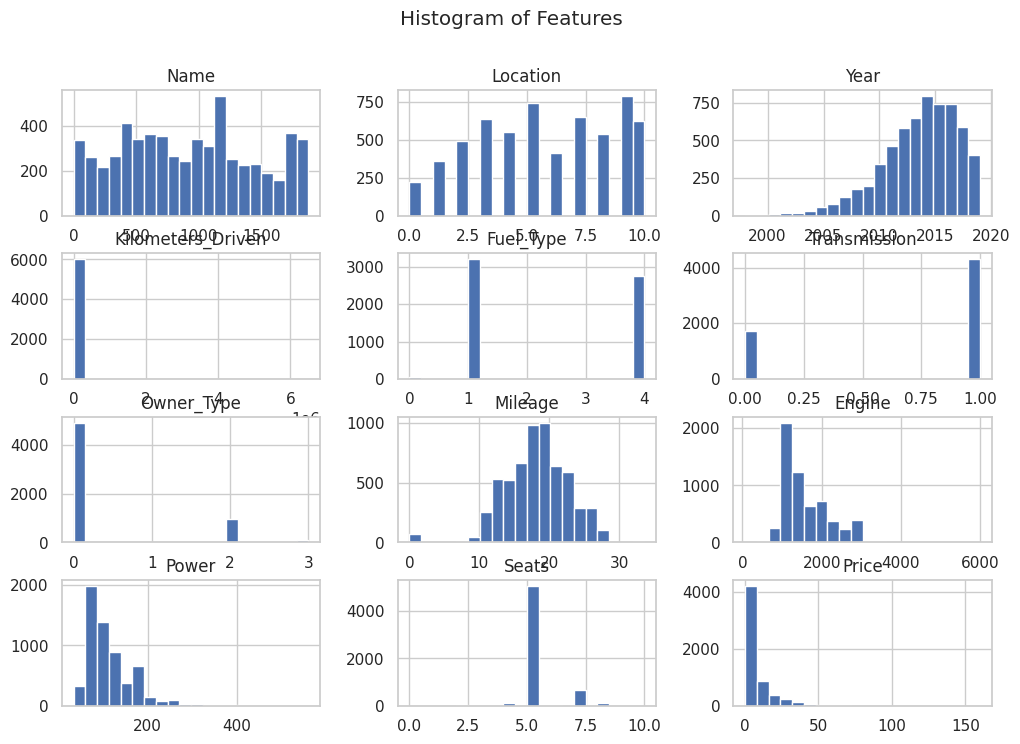

In [220]:
import matplotlib.pyplot as plt
train_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Features')
plt.show()

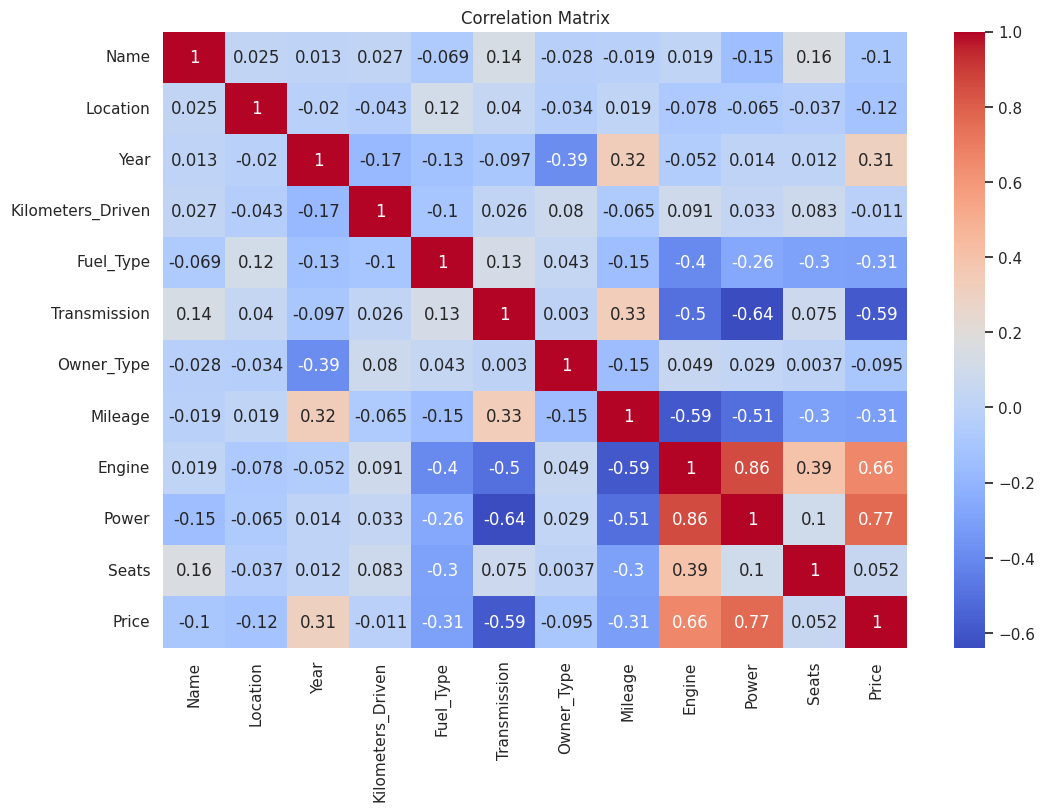

In [221]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [222]:
#Now we have to perform normalization of the data such that the data which in converted from categorical to numerical does not get normailized
#So what we do is create a list of columns which we want to normalize and named it as original_numerical_columns
#Then we perform standard scaling on those columns
#Then we find the remaining columns or we can say those we converted from categorical to numerical by removing the original_numerical_columns from the original data
#And finally we concat the standardized and remaining to achive what we were looking for
#The problem we can observe here is that the price column is not at the end as it used to be so we will move it toward the end by reorganizing the dataframe
from sklearn.preprocessing import StandardScaler

original_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats','Price']

scaler = StandardScaler()

standardized_columns = pd.DataFrame(scaler.fit_transform(train_df[original_numerical_columns]),
                                    columns=original_numerical_columns)

remaining_columns = train_df.drop(columns=original_numerical_columns)

standardized_train_df = pd.concat([remaining_columns.reset_index(drop=True), standardized_columns], axis=1)
standardized_train_df = standardized_train_df[[col for col in standardized_train_df.columns if col != 'Price'] + ['Price']]
mean_price = scaler.mean_[-1]
std_price = scaler.scale_[-1]
standardized_train_df.head()


,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,1200,9,2010,0,1,0,0.145315,1.847799,-1.039653,-1.035066,-0.345849,-0.690934
1,512,10,2015,1,1,0,-0.194369,0.335077,-0.065515,0.243242,-0.345849,0.270004
2,486,2,2011,4,1,0,-0.139581,0.014197,-0.704376,-0.461293,-0.345849,-0.445113
3,1059,2,2012,1,1,0,0.309678,0.575192,-0.622642,-0.460166,2.135710,-0.311028
4,23,3,2013,1,0,2,-0.197985,-0.640661,0.578351,0.517541,-0.345849,0.738405


In [223]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset for testing
# test_df = pd.read_csv('your_test_file.csv')

original_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

scaler = StandardScaler()

standardized_columns_test = pd.DataFrame(scaler.fit_transform(test_df[original_numerical_columns]),
                                         columns=original_numerical_columns)

remaining_columns_test = test_df.drop(columns=original_numerical_columns)

standardized_test_df = pd.concat([remaining_columns_test.reset_index(drop=True), standardized_columns_test], axis=1)


standardized_test_df.head()


,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Kilometers_Driven,Mileage,Engine,Power,Seats
0,413,4,2014,0,1,0,-0.493990,3.156342,-1.060086,-1.026165e+00,-1.563474
1,408,3,2013,3,1,2,-0.112811,1.462341,-1.419628,-1.240521e+00,-0.346333
2,723,9,2017,1,1,0,-0.688711,-1.006958,1.422885,7.358824e-01,2.087949
3,689,5,2012,1,1,0,2.262030,1.213618,-0.408640,-2.794665e-16,-0.346333
4,333,9,2014,3,1,0,-0.829223,0.073080,-0.705885,-5.414051e-01,-0.346333


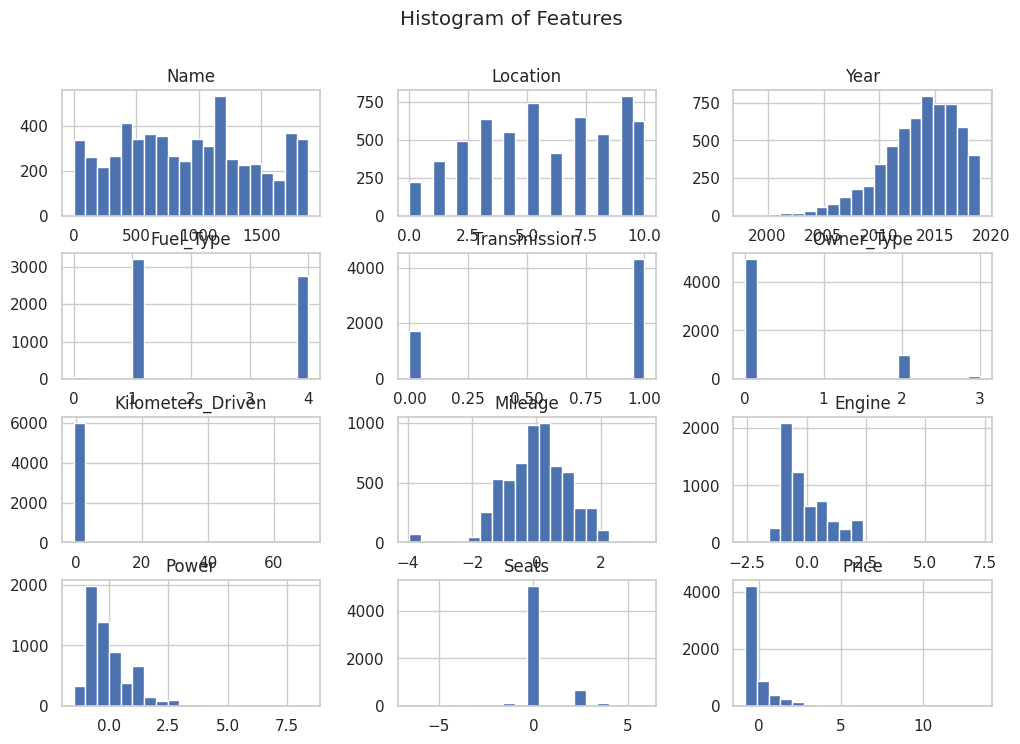

In [224]:
standardized_train_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Features')
plt.show()

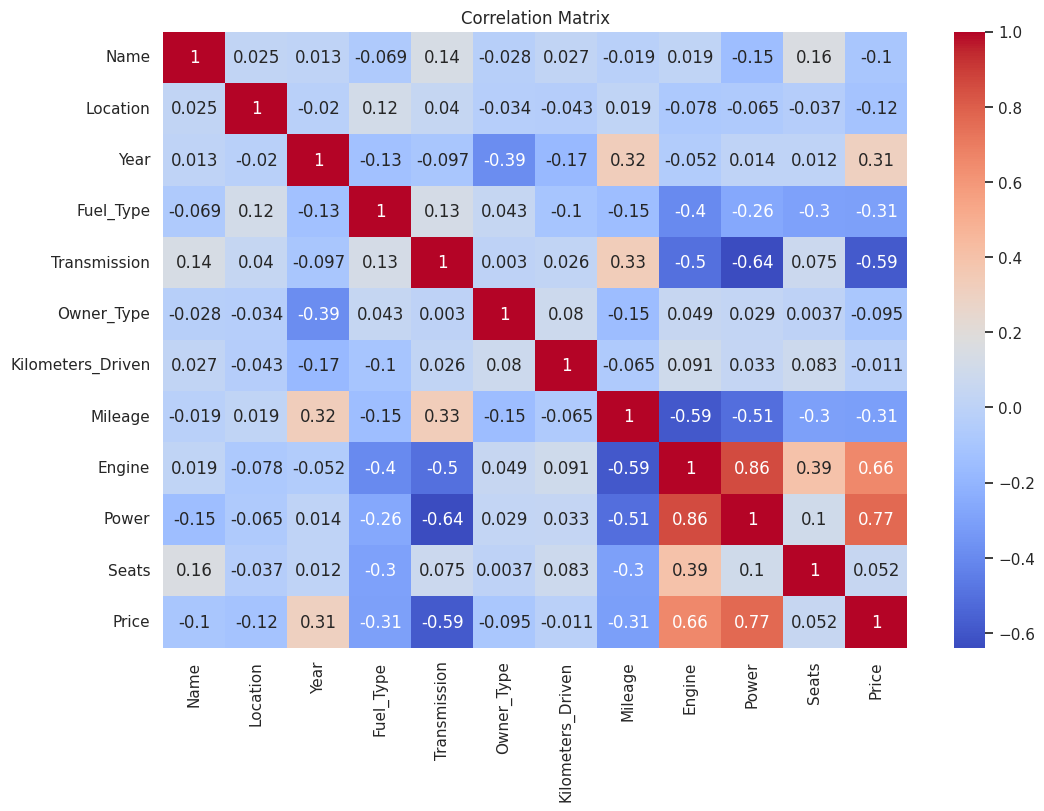

In [225]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.heatmap(standardized_train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

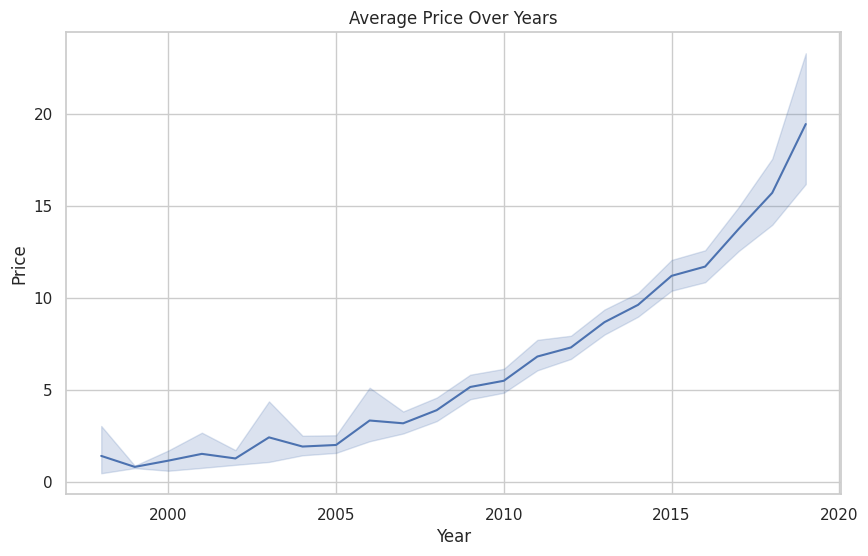

In [226]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Price', data=train_df, estimator='mean')
plt.title('Average Price Over Years')
plt.show()


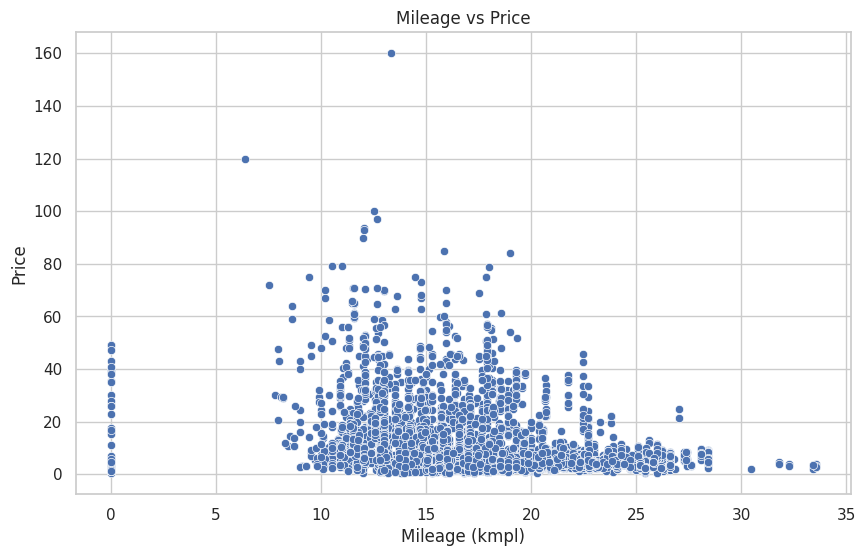

In [227]:
#The major problem I came across is that I am not converting kmpl into km/kg as I go through the data I found that there are total 5 fuel types namely CNG,Petrol,Diesal,LPG,Electric
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=train_df)
plt.title('Mileage vs Price')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price')
plt.show()


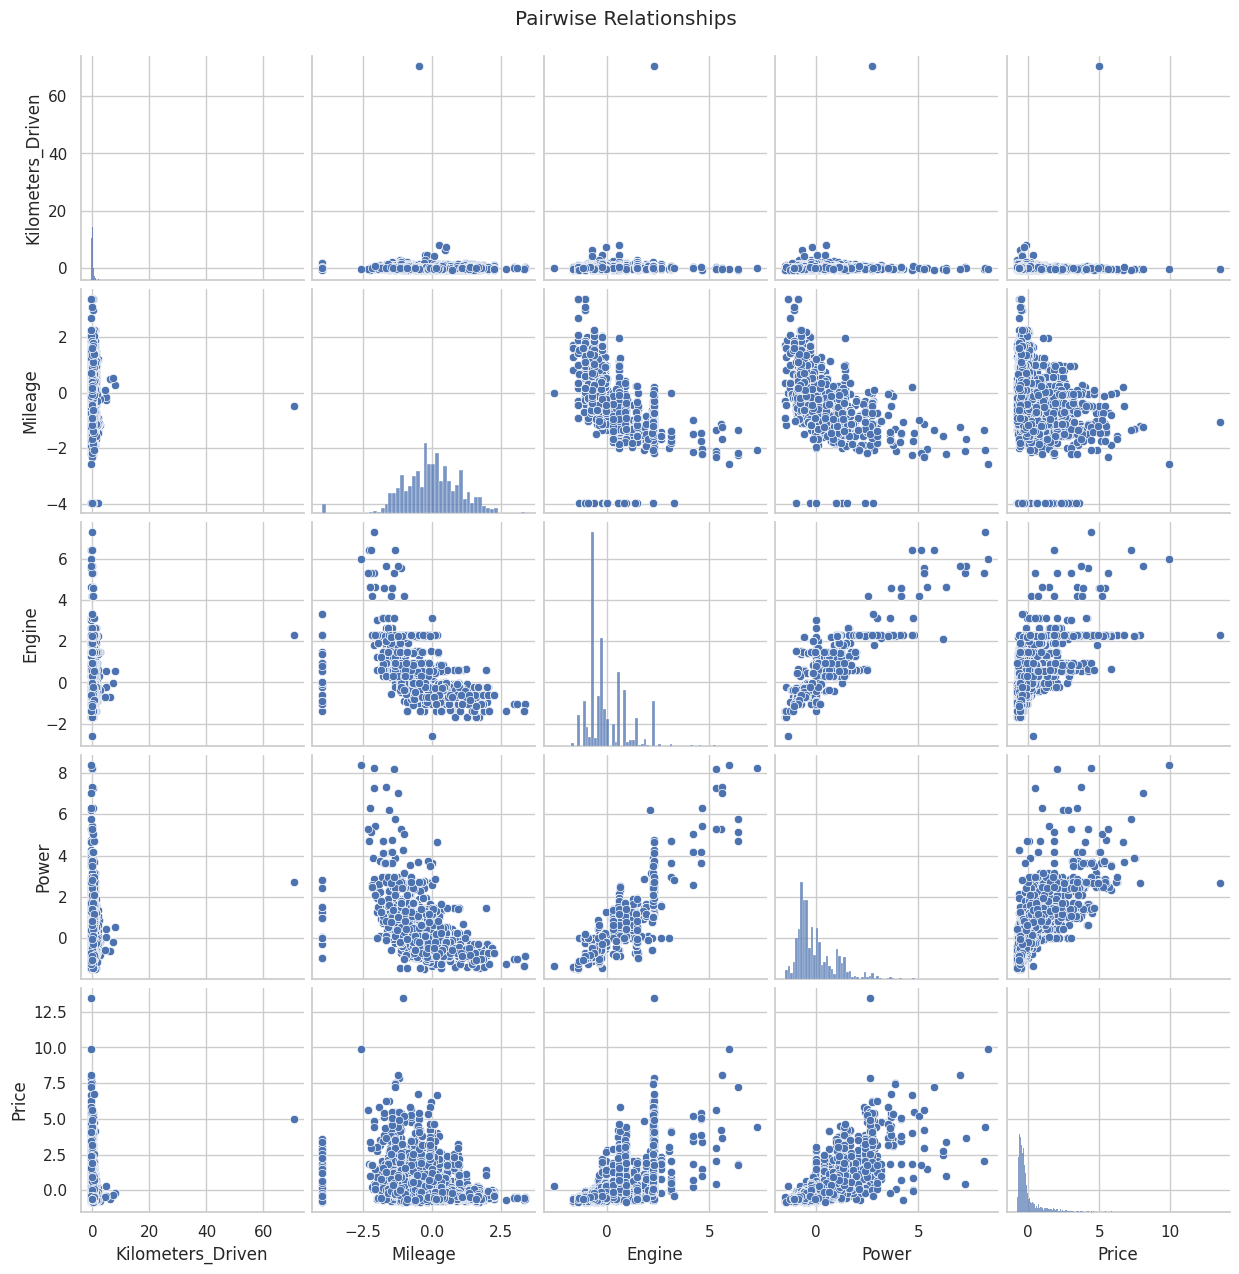

In [228]:
sns.pairplot(standardized_train_df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

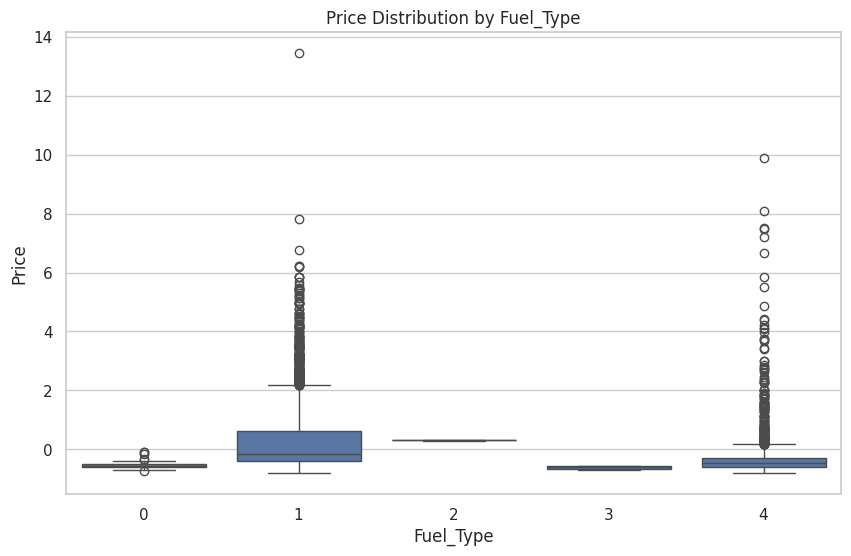

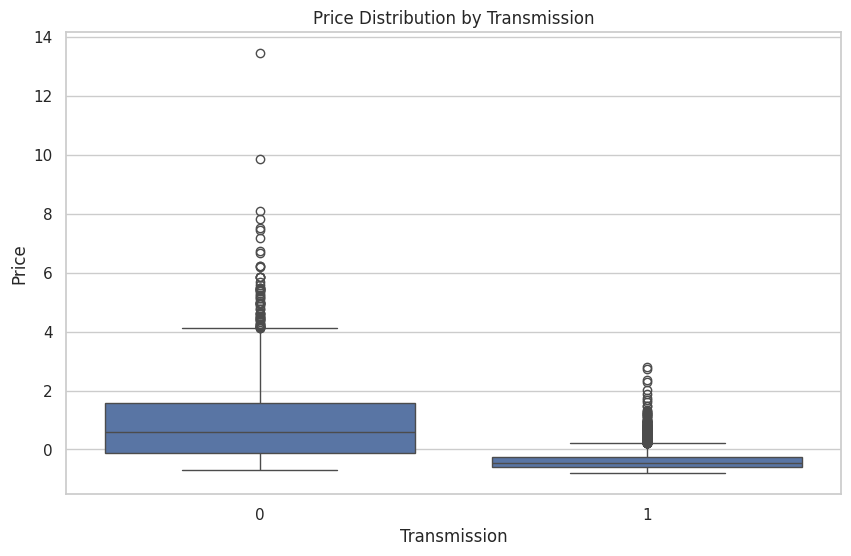

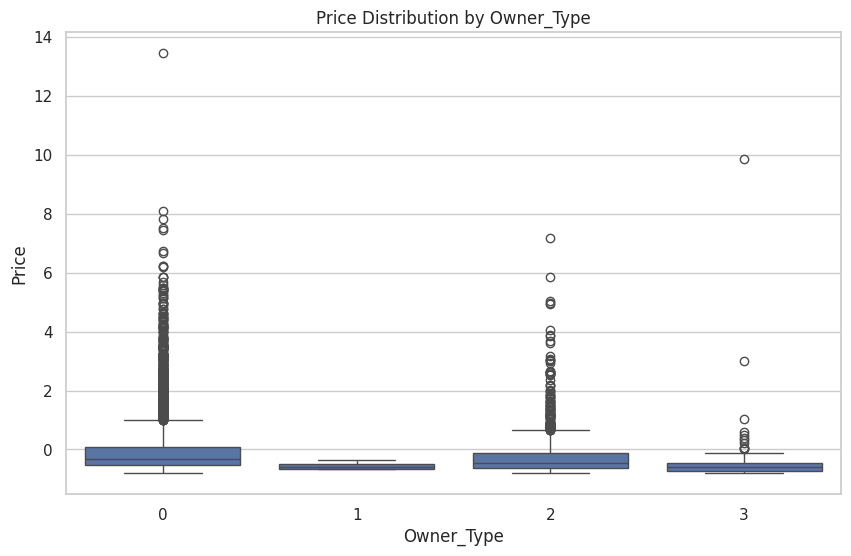

In [229]:
categorical_features = ['Fuel_Type', 'Transmission', 'Owner_Type']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Price', data=standardized_train_df)
    plt.title(f'Price Distribution by {feature}')
    plt.show()

Using Linear Regression


In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming standardized_train_df is your DataFrame with standardized values

# Define features (X) and target variable (y)
X = standardized_train_df.drop(columns='Price')
y = standardized_train_df['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model.predict(X_test)

# Evaluate the model on testing data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Testing Mean Squared Error: {mse_test}')
print(f'Testing R^2 Score: {r2_test}')


Testing Mean Squared Error: 0.5308788963135868
Testing R^2 Score: 0.46010828336533016


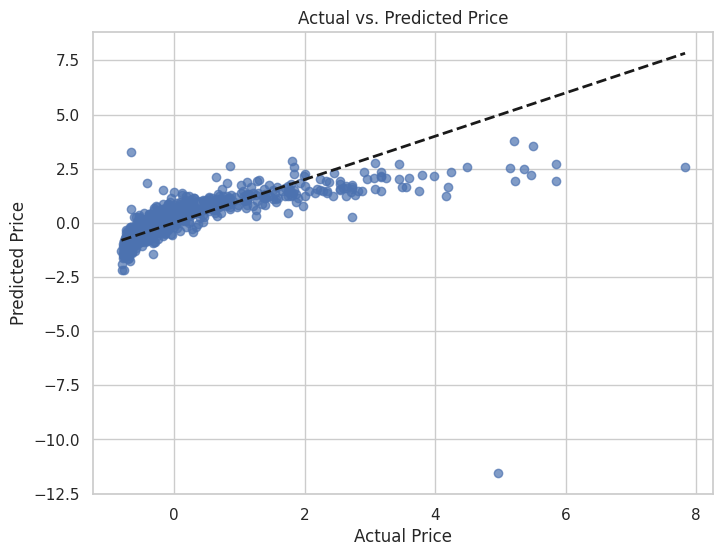

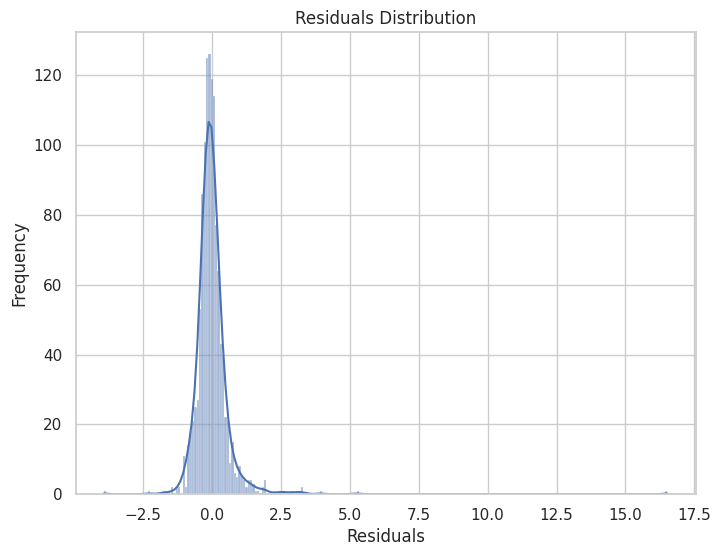

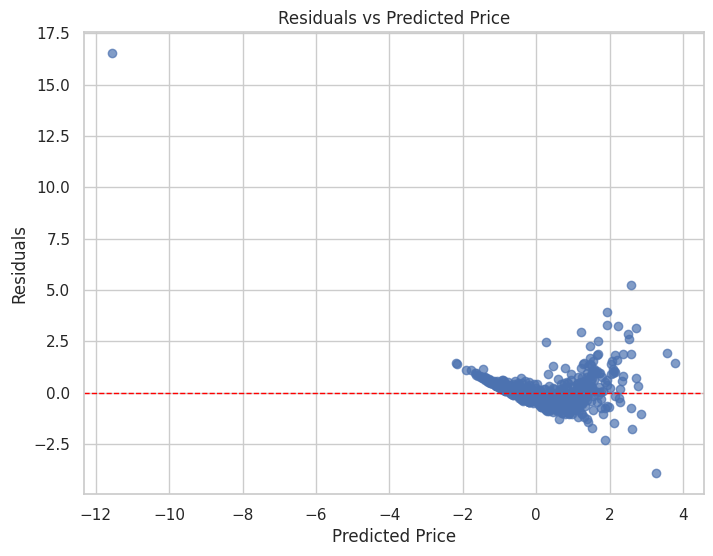

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prediction vs. Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price")
plt.show()

# Residual Plot
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

# Scatter Plot of Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price")
plt.show()


As we can see Linear Regression struggles to make prediction as the MSE and R square values are not satisfactory enough.
So now we going to use KNN


In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Weighted KNN Regressor
k = 5  # You can experiment with different values of k
knn_weighted = KNeighborsRegressor(n_neighbors=k, weights='distance')

# Fit the model on the training data
knn_weighted.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test_weighted = knn_weighted.predict(X_test)

# Evaluate the model
mse_test_weighted = mean_squared_error(y_test, y_pred_test_weighted)
r2_test_weighted = r2_score(y_test, y_pred_test_weighted)

print(f'Testing Mean Squared Error (Weighted KNN): {mse_test_weighted}')
print(f'Testing R^2 Score (Weighted KNN): {r2_test_weighted}')


Testing Mean Squared Error (Weighted KNN): 0.13512932767162197
Testing R^2 Score (Weighted KNN): 0.8625765590025891


In [233]:
#So in order to find the best K we use iteration and for each iteration we print its MSE value
#The one with lowest MSE value will be most suitable

for k in range(1, 21):
    knn_weighted = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn_weighted.fit(X_train, y_train)
    y_pred_test_weighted = knn_weighted.predict(X_test)
    mse_test_weighted = mean_squared_error(y_test, y_pred_test_weighted)
    print(f'k={k}, Testing Mean Squared Error (Weighted KNN): {mse_test_weighted}')


k=1, Testing Mean Squared Error (Weighted KNN): 0.13770570465122134
k=2, Testing Mean Squared Error (Weighted KNN): 0.1342911097545517
k=3, Testing Mean Squared Error (Weighted KNN): 0.1260099123280142
k=4, Testing Mean Squared Error (Weighted KNN): 0.1325249551316199
k=5, Testing Mean Squared Error (Weighted KNN): 0.13512932767162197
k=6, Testing Mean Squared Error (Weighted KNN): 0.13025838459932035
k=7, Testing Mean Squared Error (Weighted KNN): 0.12885281097573537
k=8, Testing Mean Squared Error (Weighted KNN): 0.1330439335042159
k=9, Testing Mean Squared Error (Weighted KNN): 0.13615013153779265
k=10, Testing Mean Squared Error (Weighted KNN): 0.13553715457982413
k=11, Testing Mean Squared Error (Weighted KNN): 0.13796661555285147
k=12, Testing Mean Squared Error (Weighted KNN): 0.14297377242093215
k=13, Testing Mean Squared Error (Weighted KNN): 0.14299752655555303
k=14, Testing Mean Squared Error (Weighted KNN): 0.14825754241398253
k=15, Testing Mean Squared Error (Weighted KNN)

In [234]:
#By observing from previos we can say that k=3 is the most suitable for the given data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Weighted KNN Regressor
k = 3  # You can experiment with different values of k
knn_weighted = KNeighborsRegressor(n_neighbors=k, weights='distance')

# Fit the model on the training data
knn_weighted.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test_weighted = knn_weighted.predict(X_test)

# Evaluate the model
mse_test_weighted = mean_squared_error(y_test, y_pred_test_weighted)
r2_test_weighted = r2_score(y_test, y_pred_test_weighted)

print(f'Testing Mean Squared Error (Weighted KNN): {mse_test_weighted}')
print(f'Testing R^2 Score (Weighted KNN): {r2_test_weighted}')

Testing Mean Squared Error (Weighted KNN): 0.1260099123280142
Testing R^2 Score (Weighted KNN): 0.8718507961944489


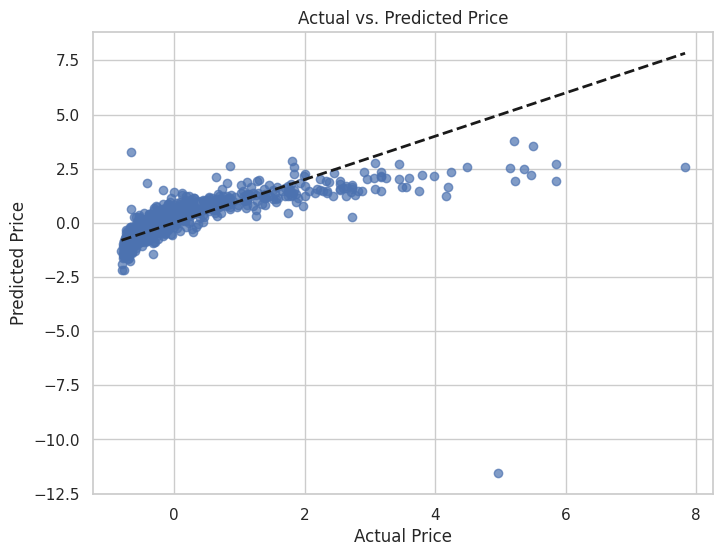

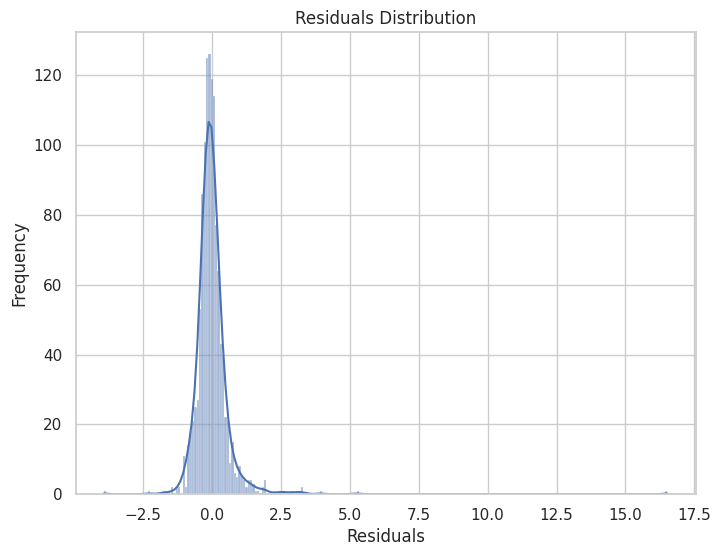

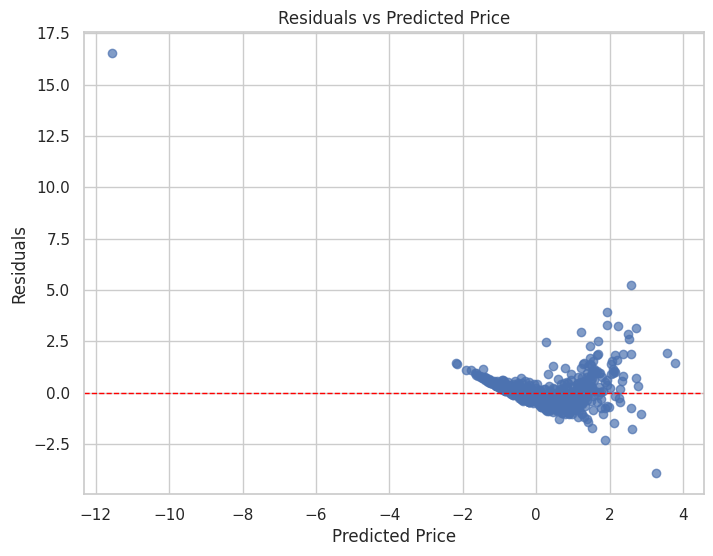

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred_test contains your predicted values and y_test contains actual values

# Prediction vs. Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price")
plt.show()

# Residual Plot
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

# Scatter Plot of Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price")
plt.show()


In [236]:
from sklearn.svm import SVR
model = SVR(kernel='poly', degree=3)  # Using polynomial kernel of degree 3
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model.predict(X_test)

# Evaluate the model on testing data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Testing Mean Squared Error: {mse_test}')
print(f'Testing R^2 Score: {r2_test}')

Testing Mean Squared Error: 0.964103039268743
Testing R^2 Score: 0.019529221263220986


In [237]:
model = SVR(kernel='rbf')  # Using polynomial kernel of degree 3
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model.predict(X_test)

# Evaluate the model on testing data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Testing Mean Squared Error: {mse_test}')
print(f'Testing R^2 Score: {r2_test}')

Testing Mean Squared Error: 0.9619791540101867
Testing R^2 Score: 0.021689164079067513


As we can see the SVM model is performing extremlly poor
Therefore we try some different models to check which fits the best.

In [238]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
max_depth_values = [None, 3, 5, 10, 15, 20, 25]

# Store results
results = []

for max_depth in max_depth_values:
    # Create and fit the Decision Tree Regression model
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred_test = model.predict(X_test)

    # Evaluate the model on testing data
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Store results
    results.append((max_depth, mse_test, r2_test))

# Print results
for max_depth, mse, r2 in results:
    print(f'Max Depth: {max_depth}, Testing Mean Squared Error: {mse}, Testing R^2 Score: {r2}')

Max Depth: None, Testing Mean Squared Error: 0.19091983607659044, Testing R^2 Score: 0.8058388857519893
Max Depth: 3, Testing Mean Squared Error: 0.27672494640479156, Testing R^2 Score: 0.7185770476325934
Max Depth: 5, Testing Mean Squared Error: 0.2039972275602262, Testing R^2 Score: 0.7925394771934068
Max Depth: 10, Testing Mean Squared Error: 0.16096042572140673, Testing R^2 Score: 0.8363069220562018
Max Depth: 15, Testing Mean Squared Error: 0.17915267515923716, Testing R^2 Score: 0.8178058197395734
Max Depth: 20, Testing Mean Squared Error: 0.1832024442276552, Testing R^2 Score: 0.8136872970604752
Max Depth: 25, Testing Mean Squared Error: 0.19138889507005588, Testing R^2 Score: 0.805361863465092


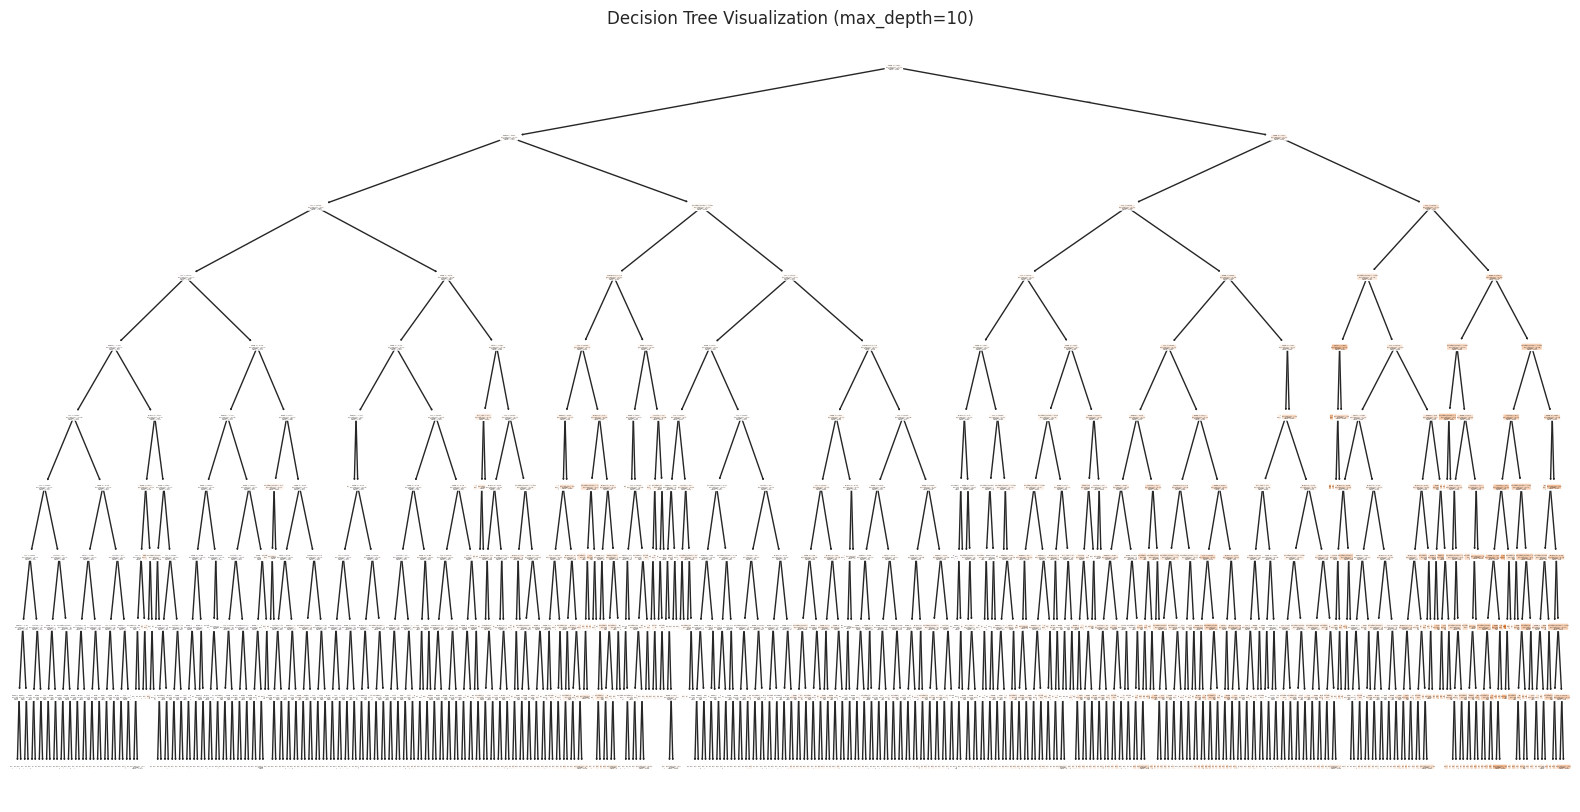

In [239]:
#As we can see the Decision Tree with max depth=10 is performing compararitevly good,so lets plot it
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Visualization (max_depth=10)")
plt.show()

Now lets try RandomFoerst Regression method

In [240]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_test = rf_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Testing Mean Squared Error: {mse_test}')
print(f'Testing R^2 Score: {r2_test}')

Testing Mean Squared Error: 0.11798475690612661
Testing R^2 Score: 0.8800121960298336


In [241]:
# We can change the values of the parameters to obtain different predictions
#Lets see the changes caused by changing the n_estimators

rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Testing Mean Squared Error: {mse_test}')
print(f'Testing R^2 Score: {r2_test}')

Testing Mean Squared Error: 0.11444736423506886
Testing R^2 Score: 0.8836096436112877


Even though we increase the n_estimators by 10 times but still the increment in performance is not that significant but at the same time the computational time is increased by significantely.

As I have tested many models KNN performs the best so we will be using KNN to predict our test-data.csv prices


In [242]:
#By observing from previos we can say that k=3 is the most suitable for the given data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

k = 3
knn_weighted = KNeighborsRegressor(n_neighbors=k, weights='distance')

knn_weighted.fit(X_train, y_train)
y_pred_test_weighted = knn_weighted.predict(standardized_test_df)

standardized_test_df['Predicted_Price'] = y_pred_test_weighted
# Convert predicted prices back to their original form (using the same mean and std as before)
#As we know Original=(Standarized)(Standard_deviation)+(mean)
# Convert standardized predictions back to original prices
standardized_test_df['Original_Predicted_Price'] = (
    standardized_test_df['Predicted_Price'] * std_price + mean_price #I have stored these std_price and mean_price while Standard Scaling the data
)


standardized_test_df.head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Kilometers_Driven,Mileage,Engine,Power,Seats,Predicted_Price,Original_Predicted_Price
0,413,4,2014,0,1,0,-0.493990,3.156342,-1.060086,-1.026165e+00,-1.563474,-0.520989,3.651165
1,408,3,2013,3,1,2,-0.112811,1.462341,-1.419628,-1.240521e+00,-0.346333,-0.366892,5.375048
2,723,9,2017,1,1,0,-0.688711,-1.006958,1.422885,7.358824e-01,2.087949,-0.316175,5.942418
3,689,5,2012,1,1,0,2.262030,1.213618,-0.408640,-2.794665e-16,-0.346333,-0.503761,3.843897
4,333,9,2014,3,1,0,-0.829223,0.073080,-0.705885,-5.414051e-01,-0.346333,-0.540430,3.433687


In [243]:
standardized_test_df.describe()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Kilometers_Driven,Mileage,Engine,Power,Seats,Predicted_Price,Original_Predicted_Price
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03,1.234000e+03,1.234000e+03,1.234000e+03,1.234000e+03,1234.000000,1234.000000
mean,381.836305,5.635332,2013.400324,1.935170,0.733387,0.358995,-8.061263e-17,3.742729e-17,-1.237980e-16,-1.036448e-16,-3.541198e-16,0.001405,9.495183
std,219.060371,3.036931,3.179700,1.004779,0.442367,0.803462,1.000405e+00,1.000405e+00,1.000405e+00,1.000405e+00,1.000405e+00,0.867277,9.702217
min,0.000000,0.000000,1996.000000,0.000000,0.000000,0.000000,-1.616087e+00,-4.072294e+00,-1.725772e+00,-1.498142e+00,-3.997755e+00,-0.774235,0.818113
25%,193.250000,3.000000,2011.000000,1.000000,0.000000,0.000000,-6.887112e-01,-6.630039e-01,-7.041049e-01,-6.721820e-01,-3.463328e-01,-0.504163,3.839400
50%,392.000000,6.000000,2014.000000,1.000000,1.000000,0.000000,-1.105766e-01,1.706161e-02,-2.359891e-01,-2.316703e-01,-3.463328e-01,-0.322781,5.868523
75%,566.000000,8.000000,2016.000000,3.000000,1.000000,0.000000,4.634831e-01,6.556733e-01,6.664243e-01,3.130697e-01,-3.463328e-01,0.080934,10.384878
max,767.000000,10.000000,2019.000000,3.000000,1.000000,3.000000,8.191616e+00,3.156342e+00,7.839454e+00,9.943365e+00,5.739371e+00,5.086037,66.376897


In [245]:
test_original=pd.read_csv('test-data.csv')
test_original['Predicted_Price']=standardized_test_df['Original_Predicted_Price']
test_original.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Predicted_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,3.651165
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,5.375048
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,5.942418
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,3.843897
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,3.433687
